# Cleaning Avengers Data

In this mission we are going to clean an Avengers dataset compiled in this [link](https://github.com/fivethirtyeight/data/tree/master/avengers) and analyze a bit of information about the famous group.

# 1. Importing and Reading Data

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

avengers = pd.read_csv('avengers.csv', encoding='latin-1')

avengers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
URL                            173 non-null object
Name/Alias                     163 non-null object
Appearances                    173 non-null int64
Current?                       173 non-null object
Gender                         173 non-null object
Probationary Introl            15 non-null object
Full/Reserve Avengers Intro    159 non-null object
Year                           173 non-null int64
Years since joining            173 non-null int64
Honorary                       173 non-null object
Death1                         173 non-null object
Return1                        69 non-null object
Death2                         17 non-null object
Return2                        16 non-null object
Death3                         2 non-null object
Return3                        2 non-null object
Death4                         1 non-null object
Return4                        1 non-null

# 2. Preliminar Data Cleaning

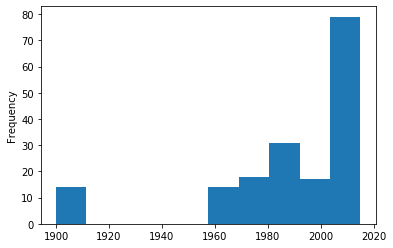

In [2]:
avengers['Year'].plot.hist()

plt.show()

As we can see above, there are some inconsistencies in the "Year" column. 

The first Avengers comic book was released in 1963! Thereby, we must eliminate the rows where "Year" is less than 1963.

First, let's sum the values to better understand the situation

In [3]:
correct_date = avengers[avengers['Year'] > 1959]

wrong_date = avengers[avengers['Year'] < 1960]

a = correct_date['Year'].value_counts().sum()

b = wrong_date['Year'].value_counts().sum()

print('Number of correct dates: {}'.format(a))

print('Number of wrong dates: {}'.format(b))

Number of correct dates: 159
Number of wrong dates: 14


Since the amount of incorrect "Year" entries is approximately 8% of the whole dataset, we will create a new dataframe excluding those columns.

In [4]:
true_avengers = avengers[avengers['Year'] > 1959]

true_avengers['Year'].value_counts().sum()

159

The output indicates we have successfully excluded the incorrect rows from our new dataframe. 

Now let's check our dataset for NaN or Null values

In [5]:
true_avengers.isnull().sum()

URL                              0
Name/Alias                      10
Appearances                      0
Current?                         0
Gender                           0
Probationary Introl            146
Full/Reserve Avengers Intro      0
Year                             0
Years since joining              0
Honorary                         0
Death1                           0
Return1                         91
Death2                         143
Return2                        143
Death3                         157
Return3                        157
Death4                         158
Return4                        158
Death5                         158
Return5                        158
Notes                           85
dtype: int64

Of all columns above, the only one that requires further adaptation is "Name/Alias".

"Probationary Introl" states that sometimes the character was given probationary status as an Avenger. Not all heroes are expected to fall into this category, hence the null values. 

Moreover, "Return 1" onwards is ok as some heroes might have been gone for good after one or multiple deaths, or not.

The "Name/Alias" is troublesome, though, as it leaves us unable to quickly know which character we're working with.

Luckily, the URL column, without null values, sends us to a wikia page of said hero, making our task much easier.

Let's fill those null values and proceed with our analysis.

In [6]:
true_avengers[true_avengers['Name/Alias'].isnull()]

,URL,Name/Alias,Appearances,Current?,Gender,Probationary Introl,Full/Reserve Avengers Intro,Year,Years since joining,Honorary,...,Return1,Death2,Return2,Death3,Return3,Death4,Return4,Death5,Return5,Notes
56,http://marvel.wikia.com/Gilgamesh_(Earth-616)#,NaN,61,NO,MALE,NaN,Feb-89,1989,26,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Killed by Neut who was working for Immortus. R...
61,http://marvel.wikia.com/Dinah_Soar_(Earth-616)#,NaN,22,NO,FEMALE,NaN,Jul-89,1989,26,Full,...,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Died in Great_Lakes_Avengers_Vol_1_1. Has not ...
67,http://marvel.wikia.com/Monkey_Joe_(Earth-616)#,NaN,7,NO,MALE,NaN,5-May,2005,10,Full,...,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Killed by Leather Boy
69,http://marvel.wikia.com/Tippy-Toe_(Earth-616)#,NaN,16,NO,FEMALE,NaN,5-Jul,2005,10,Full,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80,http://marvel.wikia.com/Melissa_Darrow_(Earth-...,NaN,28,NO,FEMALE,NaN,Jun-93,1993,22,Honorary,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,http://marvel.wikia.com/Deathcry_(Earth-616)#,NaN,50,NO,FEMALE,NaN,Jul-93,1993,22,Honorary,...,YES,YES,NO,NaN,NaN,NaN,NaN,NaN,NaN,Reduced her to a pile of bones and organsby V...
148,http://marvel.wikia.com/Captain_Universe_(Eart...,NaN,55,YES,MALE,NaN,13-Feb,2013,2,Full,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
153,http://marvel.wikia.com/Ex_Nihilo_(Earth-616)#,NaN,24,YES,MALE,NaN,13-Oct,2013,2,Full,...,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Died in New_Avengers_Vol_3_32
154,http://marvel.wikia.com/Abyss_(Ex_Nihilo%27s)_...,NaN,25,YES,FEMALE,NaN,13-Oct,2013,2,Full,...,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Died in New_Avengers_Vol_3_32
166,http://marvel.wikia.com/Doombot_(Avenger)_(Ear...,NaN,14,YES,MALE,NaN,13-Sep,2013,2,Full,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
a = true_avengers[true_avengers['Name/Alias'].isnull()]['URL']
print(a)

56        http://marvel.wikia.com/Gilgamesh_(Earth-616)#
61       http://marvel.wikia.com/Dinah_Soar_(Earth-616)#
67       http://marvel.wikia.com/Monkey_Joe_(Earth-616)#
69        http://marvel.wikia.com/Tippy-Toe_(Earth-616)#
80     http://marvel.wikia.com/Melissa_Darrow_(Earth-...
81         http://marvel.wikia.com/Deathcry_(Earth-616)#
148    http://marvel.wikia.com/Captain_Universe_(Eart...
153       http://marvel.wikia.com/Ex_Nihilo_(Earth-616)#
154    http://marvel.wikia.com/Abyss_(Ex_Nihilo%27s)_...
166    http://marvel.wikia.com/Doombot_(Avenger)_(Ear...
Name: URL, dtype: object


In [8]:
missing_chars = ['Gilgamesh','Dinah Soar','Monkey Joe','Tippy Toe','Magdalene','Deathcry','Captain Universe','Ex Nihilo','Abyss','Doombot']
missing_rows = [56, 61, 67, 69, 80, 81, 148, 153, 154, 166]
counter = 0

for row in missing_rows: 
    true_avengers.at[row,'Name/Alias'] = missing_chars[counter]
    counter += 1

In [9]:
true_avengers[true_avengers['Name/Alias'].isnull()]

,URL,Name/Alias,Appearances,Current?,Gender,Probationary Introl,Full/Reserve Avengers Intro,Year,Years since joining,Honorary,...,Return1,Death2,Return2,Death3,Return3,Death4,Return4,Death5,Return5,Notes


In [10]:
true_avengers[true_avengers['Name/Alias'].isnull()]['Name/Alias']

Series([], Name: Name/Alias, dtype: object)

Now we have successfully dealt with the missing names and are ready to move on to the next steps which are about arbitrary analysis on the data.

# 3. Adding a new column

Now we want to add a new column representing the number of times each caracter died and rank them accordingly.

In [11]:
pd.set_option('mode.chained_assignment', None)

def clean_deaths(row):
    num_deaths = 0
    columns = ['Death1', 'Death2', 'Death3', 'Death4', 'Death5']
    
    for c in columns:
        death = row[c]
        if pd.isnull(death) or death == 'NO':
            continue
        elif death == 'YES':
            num_deaths += 1
    return num_deaths

true_avengers['Deaths'] = true_avengers.apply(clean_deaths, axis=1)

true_avengers[['Name/Alias','Deaths']].sort_values(ascending=False, by='Deaths').head(20)

,Name/Alias,Deaths
32,Jocasta,5
29,Mar-Vell,3
81,Deathcry,2
18,Heather Douglas,2
51,Anthony Ludgate Druid,2
52,Marrina Smallwood,2
53,Ravonna Lexus Renslayer,2
55,Dennis Dunphy,2
73,Peter Benjamin Parker,2
78,Eric Kevin Masterson,2


# 4. Verifying the "Years since joining" column. 

Since this dataset was created on 2015, this column should represent the correct result of (2015 - "Year").

Let's make sure this is the case.

In [12]:
correct_count = true_avengers[true_avengers['Years since joining'] == (2015 - true_avengers['Year'])]

print('The number of correct rows is: {}'.format(correct_count.shape[0]))

The number of correct rows is: 159


This last piece of code allowed us to see that the "Years since joining" column has been filled with correct values in all rows.

# 5. Conclusion

In summary, the following alterations were done to the dataset:

* Data Cleaning in rows with incorrect year entries
* Addition of names in rows without them
* Classification of characters according to number of deaths
* Verification of the veracity of 'Years since joining' column